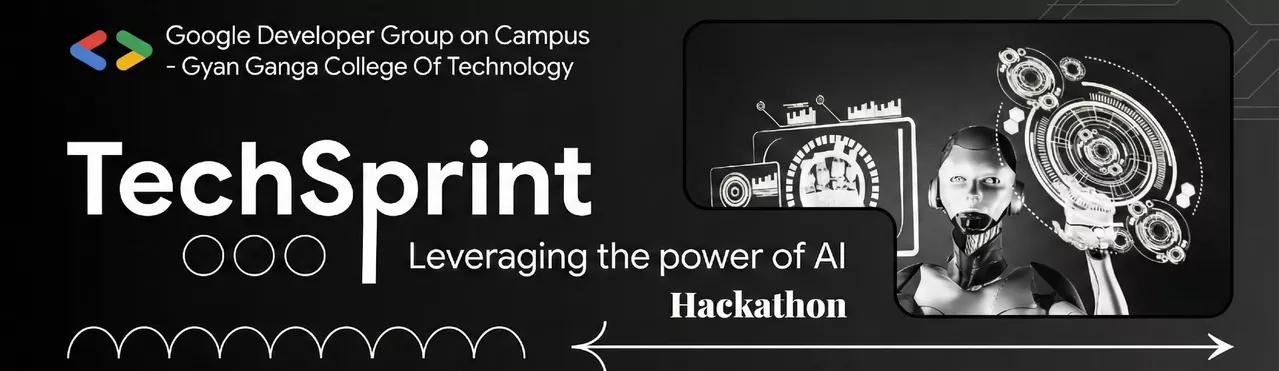

# ***TechSprint – Leveraging the Power of AI Hackathon (via Hack2Skill)***

## **Prototype Title - Gamified : A Gentle Digital Fast**

### **Team Name - AI Devilops**
#### *Team Lead and Member (only) : Deepak Kaura*




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -----------------------------
# Load and prepare your data
# -----------------------------
df = pd.read_csv('/content/Cleaned_DataSet2.csv')

df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterestVariance,Sleeplessness
0,21,Male,In A Relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, Youtube, Discord...",6,3.5,5,3,2,2,5,2,3,2,5,4,5
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, Youtube, Discord...",6,6.0,4,3,2,5,4,5,1,1,5,4,5
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, Youtube, Pinterest",4,3.5,2,2,1,5,4,3,3,1,4,2,5
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,6.0,3,2,1,5,3,5,1,2,4,3,2
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, Youtube",3,3.5,4,5,4,5,5,3,3,3,4,4,1


In [ ]:
df["User_ID"] = df.index + 1   # start from 1 instead of 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           479 non-null    int64  
 1   Gender                        479 non-null    object 
 2   RelationshipStatus            479 non-null    object 
 3   Occupation                    479 non-null    object 
 4   Organization                  479 non-null    object 
 5   SocialMedia                   479 non-null    object 
 6   SocialMediaPlatforms          479 non-null    object 
 7   NumberofSocialMediaPlatforms  479 non-null    int64  
 8   HoursSpent                    479 non-null    float64
 9   Frequency                     479 non-null    int64  
 10  Distraction                   479 non-null    int64  
 11  Restlessness                  479 non-null    int64  
 12  Anxiety                       479 non-null    int64  
 13  Conce

In [ ]:
df.HoursSpent.value_counts()

,count
HoursSpent,
3.5,260
6.0,115
1.0,104


In [ ]:
df.Gender.value_counts()

,count
Gender,
Female,263
Male,211
Non Binary,4
Trans,1


In [ ]:
df.RelationshipStatus.value_counts()

,count
RelationshipStatus,
Single,284
Married,101
In A Relationship,87
Divorced,7


In [ ]:
df.Organization.value_counts()

,count
Organization,
University,308
Company,108
School,54
Government,9


In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
University Student,292
Salaried Worker,131
School Student,48
Retired,8


In [ ]:
df.SocialMediaPlatforms.value_counts()

,count
SocialMediaPlatforms,
"Facebook, Instagram, Youtube",35
"Facebook, Youtube",30
"Facebook, Instagram, Youtube, Snapchat",27
"Facebook, Instagram, Youtube, Snapchat, Discord",19
"Facebook, Instagram, Youtube, Discord",18
...,...
"Facebook, Instagram, Youtube, Reddit, Tiktok",1
"Facebook, Twitter, Youtube, Pinterest",1
"Instagram, Discord",1


In [ ]:
df['HoursSpent'] = df['HoursSpent'].map({
    "Less than 2": 1.0,
    "2 to 5": 3.5,
    "More than 5": 6
})

In [ ]:
df['Gender'] = df['Gender'].map({
    "Male": 0,
    "Female": 1,
    "Non binary": 2,
    "Trans": 3
})

In [ ]:
df['RelationshipStatus'] = df['RelationshipStatus'].map({
    "Single": 0,
    "Married": 1,
    "In a relationship": 2,
    "Divorced": 3
})

In [ ]:
df['Organization'] = df['Organization'].map({
    "University": 0,
    "Company": 1,
    "School": 2,
    "Government": 3
})

In [ ]:
df['Occupation'] = df['Occupation'].map({
    "University Student": 0,
    "Salaried Worker": 1,
    "School Student": 2,
    "Retired": 3

})

In [ ]:
#mode_value = df['HoursSpent'].mode()[0]
#df['HoursSpent'].fillna(mode_value, inplace=True)

/tmp/ipython-input-561323238.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
RelationshipStatus,0
Occupation,0
Organization,0
SocialMedia,0
SocialMediaPlatforms,0
NumberofSocialMediaPlatforms,0
HoursSpent,0
Frequency,0


In [ ]:
# Select features for clustering
features = df[["HoursSpent",
    "Distraction", "Restlessness", "Anxiety", "ConcentrationDifficulty",
    "SelfComparision", "ValidationSeeking", "Depression",
    "Sleeplessness", "ActivityInterestVariance"]]

# -----------------------------
# Scale features — very important for K-Means
# -----------------------------
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# -----------------------------
# Find optimal k with Elbow Method
# -----------------------------
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Distortion / SSE

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(k_range),
        y=inertia,
        mode='lines+markers',
        marker=dict(color='royalblue', size=8),
        line=dict(width=2),
        name='Inertia'
    )
)

fig.update_layout(
    title='Elbow Method For Optimal k',
    xaxis_title='Number of clusters (k)',
    yaxis_title='Inertia (SSE)',
    xaxis=dict(tickmode='linear'),
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


In [ ]:
# Suppose you choose k= from the elbow
optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Social_Impact_Type'] = kmeans_final.fit_predict(features_scaled)

# Select columns by passing a list of column names
print(df.groupby('Social_Impact_Type')[features.columns].mean())

                    HoursSpent  Distraction  Restlessness   Anxiety  \
Social_Impact_Type                                                    
0                     4.779070     4.186047      3.767442  4.348837   
1                     3.642857     3.600000      2.733333  2.790476   
2                     4.311404     4.131579      3.228070  4.438596   
3                     2.632653     2.561224      1.642857  3.979592   
4                     2.118421     1.684211      1.276316  1.921053   

                    ConcentrationDifficulty  SelfComparision  \
Social_Impact_Type                                             
0                                  4.279070         2.941860   
1                                  2.685714         2.247619   
2                                  4.166667         4.184211   
3                                  3.285714         2.632653   
4                                  1.407895         1.736842   

                    ValidationSeeking  Depression  Sl

In [ ]:
#cluster_avg = df.groupby("Social_Impact_Type")[features.columns].mean().sort_values(by="ConcentrationDifficulty")
#ordered_clusters = cluster_avg.index.tolist()

In [ ]:
cluster_avg = (
    df.groupby("Social_Impact_Type")[features.columns]
      .mean()
      .sort_values(by=["ConcentrationDifficulty", "HoursSpent"])
)
ordered_clusters = cluster_avg.index.tolist()

In [ ]:
ordered_clusters

[4, 1, 3, 2, 0]

In [ ]:
# Make a mapping
segment_names = ["Healthy", "Mild Risk","Moderate Risk","High Risk", "Critical Risk",]
cluster_to_label = {cluster: segment_names[i] for i, cluster in enumerate(ordered_clusters)}

# Apply mapping
df["Social_Impact_Label"] = df["Social_Impact_Type"].map(cluster_to_label)

print(df[["User_ID","Social_Impact_Type", "Social_Impact_Label"]].head())
print('--' * 22)
print(df[["Social_Impact_Type", "Social_Impact_Label"]].value_counts())

   User_ID  Social_Impact_Type Social_Impact_Label
0        1                   3       Moderate Risk
1        2                   0       Critical Risk
2        3                   3       Moderate Risk
3        4                   3       Moderate Risk
4        5                   0       Critical Risk
--------------------------------------------
Social_Impact_Type  Social_Impact_Label
2                   High Risk              114
1                   Mild Risk              105
3                   Moderate Risk           98
0                   Critical Risk           86
4                   Healthy                 76
Name: count, dtype: int64


In [ ]:
import plotly.express as px


counts = df['Social_Impact_Label'].value_counts().reset_index()
counts.columns = ['Social_Impact_Label', 'Count']
counts['Social_Impact_Label'] = counts['Social_Impact_Label'].astype(str)  # 👈 ensure it's treated as categorical

# Plot
fig = px.bar(
    counts,
    x='Social_Impact_Label',
    y='Count',
    text='Count',
    color='Social_Impact_Label',
    color_discrete_map={
        'Healthy': 'lightseagreen',
        'Mild Risk': 'royalblue',
        'Moderate Risk': 'mediumorchid',
        'High Risk': 'orangered',
        'Critical Risk': 'darkred'
    },  # ✅ this works now!
    title='Social Impact Labels Distribution'
)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Social Impact Labels',
    yaxis_title='Number of Users',
    bargap=0.3
)

fig.update_traces(
    textposition='outside'
)

fig.show()


In [ ]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()

import plotly.express as px

fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap (Numeric Columns Only)"
)

fig.update_layout(
    width=1000,
    height=800
)

fig.show()


In [ ]:
df.columns

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterestVariance',
       'Sleeplessness', 'User_ID', 'Social_Impact_Type',
       'Social_Impact_Label'],
      dtype='object')

In [ ]:
corr_features = [
    'User_ID',
    'Age', # Corrected column name
    'NumberofSocialMediaPlatforms',
    'HoursSpent',
    'Occupation',
    'Organization',
    'PostSentiment',
    'Frequency',
    'Distraction',
    'Restlessness',
    'Anxiety',
    'ConcentrationDifficulty',
    'SelfComparision',
    'ValidationSeeking',
    'Depression',
    'ActivityInterestVariance',
    'Sleeplessness',
    'Social_Impact_Type'

]

import plotly.express as px
import plotly.graph_objects as go

# Calculate correlation matrix again
corr_matrix = df[corr_features].corr()

# Select only correlations with target column
target_corr = corr_matrix[['Social_Impact_Type']].drop(index='Social_Impact_Type').reset_index()
target_corr.columns = ['Feature', 'Correlation']
target_corr['AbsCorrelation'] = target_corr['Correlation'].abs()

# Sort by absolute correlation
target_corr = target_corr.sort_values(by='AbsCorrelation', ascending=False)

fig = px.bar(
    target_corr,
    x='Feature',
    y='Correlation',
    color='Correlation',
    title='Feature Correlations with Social Impact Types',
    color_continuous_scale='earth',
    text=target_corr['Correlation'].round(3)
)

fig.update_layout(
    width=900,
    height=650,
    xaxis_title='Feature',
    yaxis_title='Correlation with Social Impact Types',
    bargap=0.3
)

fig.update_traces(
    textposition='outside'
)

fig.show()

In [ ]:
# ✅ Example
selected_features = [
    'User_ID',
    'Age', # Corrected column name
    'NumberofSocialMediaPlatforms',
    'HoursSpent',
    'Occupation',
    'Organization',
    'PostSentiment',
    'Frequency',
    'Distraction',
    'Restlessness',
    'Anxiety',
    'ConcentrationDifficulty',
    'SelfComparision',
    'ValidationSeeking',
    'Depression',
    'ActivityInterestVariance',
    'Sleeplessness'
]

# Create a new DataFrame for X (features)
X = df[selected_features]

# Target variable
y = df['Social_Impact_Type']


In [ ]:
from sklearn.model_selection import train_test_split

# Split without SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,

)


In [ ]:

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import plotly.figure_factory as ff


# 2. HistGradientBoosting Classifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)
print('----' * 18)
print(f"📊 HistGradientBoosting Accuracy: {accuracy_score(y_test, y_pred_hgb):.2f}")
print('----' * 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_hgb)

# Plot confusion matrix using Plotly
labels = ["Healthy", "Mild Risk","Moderate Risk","Critical Risk", "High Risk",]
z_text = [[str(y) for y in x] for x in cm]

fig = ff.create_annotated_heatmap(
    z=cm,
    x=labels,
    y=labels,
    annotation_text=z_text,
    colorscale='Blues',
    showscale=True
)

fig.update_layout(
    title_text='Confusion Matrix - HistGradientBoosting Classifier',
    width=550,
    height=500
)

fig['data'][0]['showscale'] = True
fig.show()


------------------------------------------------------------------------
📊 HistGradientBoosting Accuracy: 0.92
------------------------------------------------------------------------


In [ ]:
X_test['Predicted_Social_Impact_Segmt'] = y_pred_hgb

In [ ]:

HoursSpent_map = {
    1.0: 'Less than 2',
    3.5: '2 to 5',
    6: 'More than 5'

}


Occupation_map = {
    0: 'University Student',
    1: 'Salaried Worker',
    2: 'School Student',
    3: 'Retired'
}

Organization_map = {
    0: 'University',
    1: 'Company',
    2: 'School',
    3: 'Government'
}

Predicted_Social_Impact_Segmt_map = {
    4: 'Healthy',
    1: 'Mild Risk',
    3: 'Moderate Risk',
    2: 'High Risk',
    0: 'Critical Risk'
}
# Apply maps

X_test['Predicted_Social_Impact_Segmt'] = X_test['Predicted_Social_Impact_Segmt'].map(Predicted_Social_Impact_Segmt_map)
X_test['Organization'] = X_test['Organization'].map(Organization_map)
X_test['Occupation'] = X_test['Occupation'].map(Occupation_map)
X_test['HoursSpent'] = X_test['HoursSpent'].map(HoursSpent_map)


In [ ]:
X_test

,User_ID,Age,NumberofSocialMediaPlatforms,HoursSpent,Occupation,Organization,PostSentiment,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,ValidationSeeking,Depression,ActivityInterestVariance,Sleeplessness,Predicted_Social_Impact_Segmt
93,94,30,1,2 to 5,Salaried Worker,University,3,2,5,3,4,4,3,3,4,4,4,High Risk
320,321,21,6,More than 5,University Student,University,3,2,3,2,4,4,4,3,4,2,4,High Risk
55,56,27,7,More than 5,University Student,University,3,4,5,5,4,5,3,4,5,2,3,Critical Risk
30,31,22,4,2 to 5,University Student,University,2,3,4,3,5,4,5,3,5,4,3,High Risk
449,450,28,5,2 to 5,University Student,University,3,4,3,1,5,4,1,1,4,1,5,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,34,1,Less than 2,Salaried Worker,School,1,1,2,1,1,1,2,1,1,1,1,Healthy
393,394,27,4,Less than 2,Salaried Worker,Company,3,2,2,1,3,1,2,4,2,2,1,Healthy
425,426,29,4,More than 5,Salaried Worker,Company,3,4,5,5,5,4,3,4,4,4,3,High Risk
42,43,56,1,Less than 2,Retired,Government,3,1,1,1,3,1,1,1,2,3,1,Healthy


2                   High Risk              114

1                   Mild Risk              105

3                   Moderate Risk           98

0                   Critical Risk           86

4                   Healthy                 76

In [ ]:
import plotly.express as px

# --------------------------------------------
# 1️⃣ Group your data
# --------------------------------------------
df_sunburst = (
    X_test.groupby(['HoursSpent', 'Predicted_Social_Impact_Segmt'])
    .agg({'User_ID': 'count'})
    .reset_index()
    .rename(columns={'User_ID': 'Count'})
)

#df_sunburst['Predicted_Churn_Label'] = df_sunburst['Predicted_Churn'].replace({1: 'Churn', 0: 'No Churn'})

# --------------------------------------------
# 2️⃣ Build sunburst
# --------------------------------------------
fig = px.sunburst(
    df_sunburst,
    path=['HoursSpent', 'Predicted_Social_Impact_Segmt'],  # hierarchy: parent → child
    values='Count',
    color='HoursSpent',  # color by CLV Cluster!
    color_discrete_sequence=px.colors.sequential.Darkmint,
    title="Sunburst: Social Impact Segments with their HoursSpent"
)

# --------------------------------------------
# 3️⃣ Style
# --------------------------------------------
fig.update_traces(
    textinfo='label+percent entry+value'
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()


In [ ]:
# Filter rows where Predicted_Churn is 'Churn'
df_2_to_5_rows = X_test[X_test['HoursSpent'] == '2 to 5']

# Select only individual_id and CLV_Cluster columns
case1_info = df_2_to_5_rows[['User_ID', 'Predicted_Social_Impact_Segmt']]

# Display result
print(case1_info.head(12).to_markdown(index=False, numalign="left", stralign="left"))


| User_ID   | Predicted_Social_Impact_Segmt   |
|:----------|:--------------------------------|
| 94        | High Risk                       |
| 31        | High Risk                       |
| 450       | Moderate Risk                   |
| 457       | Mild Risk                       |
| 434       | High Risk                       |
| 77        | Mild Risk                       |
| 272       | Mild Risk                       |
| 239       | High Risk                       |
| 465       | Moderate Risk                   |
| 105       | Mild Risk                       |
| 281       | High Risk                       |
| 279       | High Risk                       |


In [ ]:
# Filter rows where Predicted_Churn is 'Churn'
df_more_than_5_rows = X_test[X_test['HoursSpent'] == 'More than 5']

# Select only individual_id and CLV_Cluster columns
case2_info = df_more_than_5_rows[['User_ID', 'Predicted_Social_Impact_Segmt']]

# Display result
print(case2_info.head(12).to_markdown(index=False, numalign="left", stralign="left"))


| User_ID   | Predicted_Social_Impact_Segmt   |
|:----------|:--------------------------------|
| 321       | High Risk                       |
| 56        | Critical Risk                   |
| 83        | Critical Risk                   |
| 358       | Critical Risk                   |
| 322       | Mild Risk                       |
| 230       | Moderate Risk                   |
| 437       | Mild Risk                       |
| 378       | Mild Risk                       |
| 401       | Critical Risk                   |
| 395       | Critical Risk                   |
| 73        | High Risk                       |
| 442       | High Risk                       |


In [ ]:
# Filter rows where Predicted_Churn is 'Churn'
df_Less_than_2_rows = X_test[X_test['HoursSpent'] == 'Less than 2']

# Select only individual_id and CLV_Cluster columns
case3_info = df_Less_than_2_rows[['User_ID', 'Predicted_Social_Impact_Segmt']]

# Display result
print(case3_info.head(12).to_markdown(index=False, numalign="left", stralign="left"))


| User_ID   | Predicted_Social_Impact_Segmt   |
|:----------|:--------------------------------|
| 10        | Healthy                         |
| 298       | Moderate Risk                   |
| 420       | Mild Risk                       |
| 64        | Moderate Risk                   |
| 182       | Healthy                         |
| 471       | Mild Risk                       |
| 219       | Moderate Risk                   |
| 200       | Moderate Risk                   |
| 154       | Moderate Risk                   |
| 19        | Moderate Risk                   |
| 156       | Moderate Risk                   |
| 339       | Moderate Risk                   |


In [ ]:
print(case1_info['Predicted_Social_Impact_Segmt'].value_counts())


Predicted_Social_Impact_Segmt
Mild Risk        14
High Risk        12
Moderate Risk     9
Critical Risk     7
Healthy           1
Name: count, dtype: int64


In [ ]:
print(case2_info['Predicted_Social_Impact_Segmt'].value_counts())

Predicted_Social_Impact_Segmt
High Risk        10
Critical Risk     8
Mild Risk         4
Moderate Risk     3
Healthy           1
Name: count, dtype: int64


In [ ]:
print(case3_info['Predicted_Social_Impact_Segmt'].value_counts())

Predicted_Social_Impact_Segmt
Moderate Risk    14
Healthy           9
Mild Risk         4
Name: count, dtype: int64


In [ ]:
X_test.to_csv('Social Impact Test.csv', index=False)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame

X_test_df = pd.read_csv('Social Impact Test.csv')

In [ ]:
!pip install -U langchain langchain-core langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.1.3
    Uninstalling langchain-core-1.1.3:
      Successfully uninstalled langchain-core-1.1.3
  Attempting uninstall: langchain
    Found existing installation: langchain 1.1.3
    Uninstalling langchain-1.1.3:
      Successfully uninstalled langchain-1.1.3
ERROR: pip's depen

In [ ]:
!pip install txtai[pipeline]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 106.5 M

In [ ]:
from txtai.pipeline import LLM as TxtaiLLM

#txtai_llm = TxtaiLLM("MaziyarPanahi/gemma-2-2b-it-GGUF/gemma-2-2b-it.Q8_0.gguf")

txtai_llm = TxtaiLLM("muranAI/gemma-3n-E4B-it-GGUF/gemma-3n-e4b-it-q2_k.gguf")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


gemma-3n-e4b-it-q2_k.gguf:   0%|          | 0.00/2.76G [00:00<?, ?B/s]

llama_kv_cache_unified_iswa: using full-size SWA cache (ref: https://github.com/ggml-org/llama.cpp/pull/13194#issuecomment-2868343055)


In [ ]:
# api_key = "Your API Key"

In [ ]:
import gradio as gr
import google.generativeai as genai
import pandas as pd
import random

# -------- txtai + LangChain imports --------
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from txtai.pipeline import LLM as TxtaiLLM
from langchain_core.language_models.llms import BaseLLM as LangChainLLM
from langchain_core.outputs import Generation, LLMResult

# =========================
# Load Data
# =========================
X_test_df = pd.read_csv("Social Impact Test.csv")

# =========================
# Global Configuration
# =========================
MODEL = None   # Gemini (gated, optional)

# =========================
# txtai LLM Setup (Local)
# =========================
txtai_llm_instance = TxtaiLLM(
    "muranAI/gemma-3n-E4B-it-GGUF/gemma-3n-e4b-it-q2_k.gguf"
)

class TxtaiLangChainLLM(LangChainLLM):
    def _call(self, prompt, stop=None):
        return txtai_llm_instance(prompt)

    def _generate(self, prompts, stop=None, **kwargs) -> LLMResult:
        generations = []
        for prompt in prompts:
            text = self._call(prompt, stop=stop)
            generations.append([Generation(text=text)])
        return LLMResult(generations=generations)

    @property
    def _llm_type(self):
        return "txtai"

llm = TxtaiLangChainLLM()

llm_explain_prompt = PromptTemplate.from_template("""
In 1–2 upbeat sentences (max 30 words),
explain why this challenge fits the user.
Keep it encouraging and gamified.

User Segment: {segment}
Screen Time: {hours_bucket}
Challenge: {challenge}

Answer:
""")

llm_explain_chain = llm_explain_prompt | llm | StrOutputParser()

# =========================
# Wellness Suggestions
# =========================
WELLNESS_SUGGESTIONS = {
    "Critical Risk": [
        "⚠️ SOS Guardian → Focus on recovery today. Try slow breathing, gentle stretching.",
        "🧘 Calm Reset → Reduce stimulation with quiet breaks.",
        "💤 Recovery First → Prioritize rest and sleep."
    ],
    "High Risk": [
        "⚖️ Balance Builder → Add two light movement breaks.",
        "🌤️ Fresh Air Boost → Step outside for a few minutes.",
        "🧍 Mobility Care → Ease strain with stretches."
    ],
    "Moderate Risk": [
        "⚒️ Habit Shaper → Replace one screen session with movement.",
        "🎧 Active Relaxation → Stretch while listening to music.",
        "🕒 Time Awareness → Pause and reset regularly."
    ],
    "Mild Risk": [
        "🌱 Growth Seeker → Maintain balance with offline breaks.",
        "🚴 Consistency Focus → Light exercise supports wellness.",
        "🧠 Mindful Balance → Screen-free pauses help clarity."
    ],
    "Healthy": [
        "🏆 Wellness Champion → Maintain your rhythm.",
        "💪 Performance Care → Keep evenings screen-light.",
        "🌟 Sustainable Habits → Continue what’s working."
    ]
}

SCREEN_TIME_BONUS = {
    "More than 5": ["🔴 Bonus → Follow the 20-20-20 rule."],
    "2 to 5": ["🔲 Bonus → Balance screen use with stretching."],
    "Less than 2": ["🟢 Bonus → Maintain your healthy rhythm."]
}

# =========================
# Helper Functions
# =========================
def map_hours_to_bucket(hours):
    try:
        hours = float(hours)
        if hours > 5:
            return "More than 5"
        elif 2 <= hours <= 5:
            return "2 to 5"
        return "Less than 2"
    except:
        return "Less than 2"


def get_gamified_challenge(segment, hours_bucket):
    return (
        random.choice(WELLNESS_SUGGESTIONS.get(segment, []))
        + "\n"
        + random.choice(SCREEN_TIME_BONUS.get(hours_bucket, []))
    )

# =========================
# API Key Setup (Gemini – gated)
# =========================
def setup_api_key(api_key):
    global MODEL
    if not api_key:
        return "❌ API key is empty.", False

    try:
        genai.configure(api_key=api_key)
        genai.list_models()
        MODEL = genai.GenerativeModel("gemini-2.5-flash-lite")
        return "✅ API Key configured. You may proceed.", True
    except Exception as e:
        MODEL = None
        return f"❌ Invalid API Key: {e}", False

# =========================
# txtai Justification Generator
# =========================
def generate_justification(segment, hours_bucket, challenge):
    try:
        return llm_explain_chain.invoke({
            "segment": segment,
            "hours_bucket": hours_bucket,
            "challenge": challenge
        }).strip()
    except Exception:
        return "⚠️ Unable to generate explanation."

# =========================
# Main Logic
# =========================
def run_recommender(user_id, api_ready):
    if not api_ready:
        return "⚠️ Please configure API key first."

    row = X_test_df[X_test_df["User_ID"] == int(user_id)]
    if row.empty:
        return "❌ User not found."

    row = row.iloc[0]

    segment = row["Predicted_Social_Impact_Segmt"]
    hours_bucket = map_hours_to_bucket(row["HoursSpent"])
    challenge = get_gamified_challenge(segment, hours_bucket)
    justification = generate_justification(segment, hours_bucket, challenge)

    return f"""
## 🎯 Personalized Wellness Recommendation

👤 **User ID**: {row['User_ID']}
📊 **Segment**: {segment}
💻 **Screen Time**: {hours_bucket}

### 🏆 Today’s Challenge
{challenge}

### 💡 Why this fits you
{justification}
""".strip()

# =========================
# Gradio UI
# =========================
with gr.Blocks(title="Digital Wellness Recommender") as demo:
    api_ready = gr.State(False)

    gr.Markdown("# 🧠 Digital Wellness Recommender")

    with gr.Row():
        # ---------- LEFT PANEL ----------
        with gr.Column(scale=1):
            gr.Markdown("### 🔐 Step 1: Configure API Key")

            api_key_input = gr.Textbox(
                type="password",
                label="Gemini API Key"
            )

            api_btn = gr.Button("Configure API Key")
            api_status = gr.Markdown("Status: Not configured")

            gr.Markdown("---")
            gr.Markdown("### ▶️ Step 2: Select User")

            user_id_input = gr.Dropdown(
                choices=sorted(X_test_df["User_ID"].unique().tolist()),
                label="Select User ID",
                interactive=False
            )

            submit_btn = gr.Button(
                "Get Recommendation",
                variant="primary",
                interactive=False
            )

        # ---------- RIGHT PANEL ----------
        with gr.Column(scale=2):
            gr.Markdown("### 📌 Recommendation")
            recommendation_output = gr.Markdown(
                "Configure API key to begin."
            )

    # Step 1: Configure API
    api_btn.click(
        setup_api_key,
        inputs=api_key_input,
        outputs=[api_status, api_ready]
    ).then(
        lambda: (
            gr.update(interactive=True),
            gr.update(interactive=True)
        ),
        outputs=[user_id_input, submit_btn]
    )

    # Step 2: Generate Recommendation
    submit_btn.click(
        run_recommender,
        inputs=[user_id_input, api_ready],
        outputs=recommendation_output
    )

# =========================
# Launch
# =========================
if __name__ == "__main__":
    demo.launch()


llama_kv_cache_unified_iswa: using full-size SWA cache (ref: https://github.com/ggml-org/llama.cpp/pull/13194#issuecomment-2868343055)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://221c7a76034a5690c2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
